In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
df = pd.read_csv('qoura_train.csv')

In [416]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [417]:
df = df.dropna()

In [419]:
df.shape

(404287, 6)

In [427]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [434]:
#distribution of duplicate and non dupliate data

df['is_duplicate'].value_counts() / df['is_duplicate'].count() * 100

is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64

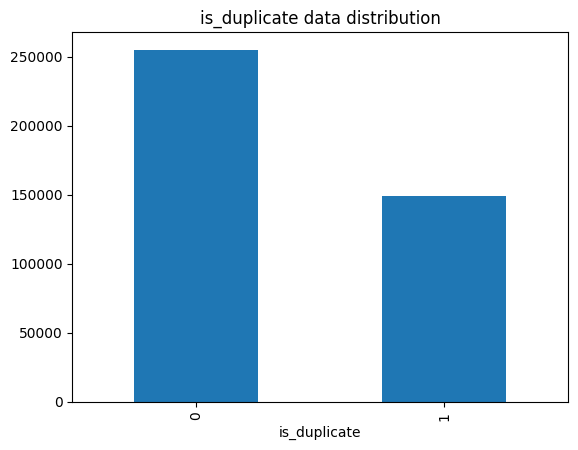

In [437]:
df['is_duplicate'].value_counts().plot(kind='bar', title='is_duplicate data distribution');

In [453]:
#Repeated questions

qids = pd.Series( df['qid1'].to_list()+df['qid2'].to_list() )

In [454]:
print('Number of unique questions: ', np.unique(qids).shape[0])

Number of unique questions:  537929


In [455]:
new_df = df.sample(30000, random_state=2)

In [456]:
qids = pd.Series( new_df['qid1'].to_list()+new_df['qid2'].to_list() )

In [466]:
len(qids)

60000

In [457]:
print('Number of unique questions: ', np.unique(qids).shape[0])

Number of unique questions:  55311


In [462]:
x = qids.value_counts() > 1

print('Number of questions getting repeated:', x[x].shape )

Number of questions getting repeated: (3485,)


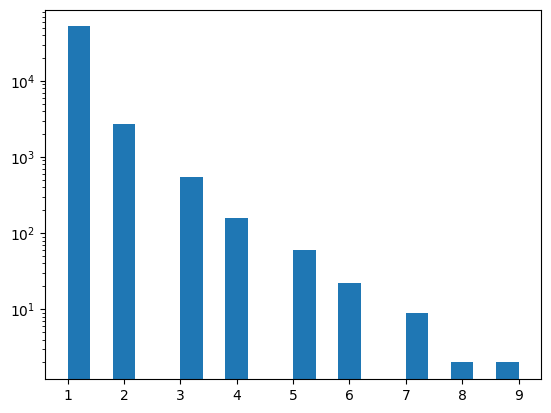

In [467]:
plt.hist(qids.value_counts().values, bins=20)
plt.yscale('log')
plt.show()

In [472]:
#Feature Engineering

#Making 2 new columns with name q1_len and q2_len which will store the length of the strings on questions

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [473]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64
...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32


In [474]:
#making 2 new column with name q1_num_words and q2_num_words which will contain the number of words of their respective questions

new_df['q1_num_words'] = new_df['question1'].apply(lambda q: len(q.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda q: len(q.split(" ")))

In [478]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [479]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [480]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8
...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1


In [482]:
new_df['word_total'] = new_df['q1_num_words']+new_df['q2_num_words']

In [483]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,26
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1,14
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5,14
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0,25
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1,10


In [484]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [485]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,26,0.19
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91979,91979,154061,154062,Is it possible that SRK is bisexual or not?,Is Lady Gaga actually bisexual?,0,43,31,9,5,1,14,0.07
125045,125045,176974,56684,Why do you think people fall in love?,How do people fall in love?,1,37,27,8,6,5,14,0.36
313995,313995,438653,438654,How do I isolate a in f=(d-e) (a+(b/c))?,What is the minimized form of this logic expre...,0,40,99,8,17,0,25,0.00
203571,203571,306230,220388,What is the function of E-commerce?,Is e-commerce model sustainable?,0,35,32,6,4,1,10,0.10


Maximum character length: 315
Minium character length: 1
Average number character length: 59.747033333333334


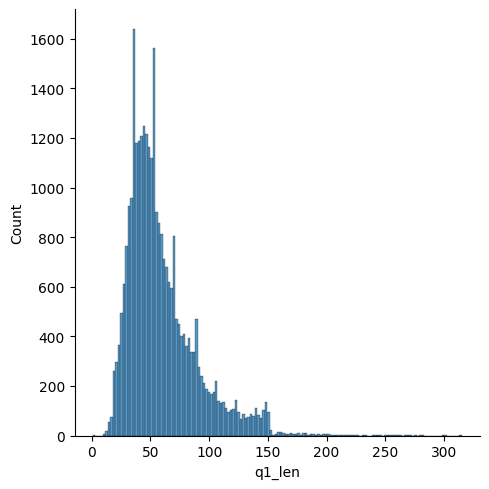

In [499]:
sns.displot(new_df['q1_len'])
print('Maximum character length:', new_df['q1_len'].max())
print('Minium character length:', new_df['q1_len'].min())
print('Average number character length:', new_df['q1_len'].mean())

Maximum character length: 1169
Minium character length: 10
Average number character length: 60


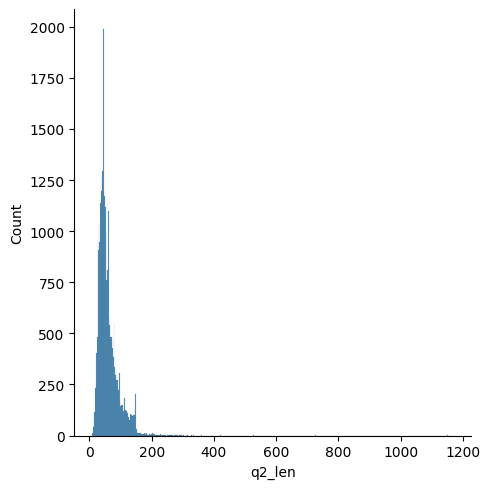

In [501]:
sns.displot(new_df['q2_len'])
print('Maximum character length:', new_df['q2_len'].max())
print('Minium character length:', new_df['q2_len'].min())
print('Average number character length:',int( new_df['q2_len'].mean()))

Minimum number of words: 1
Maximum number of words: 64
Average number of words: 10


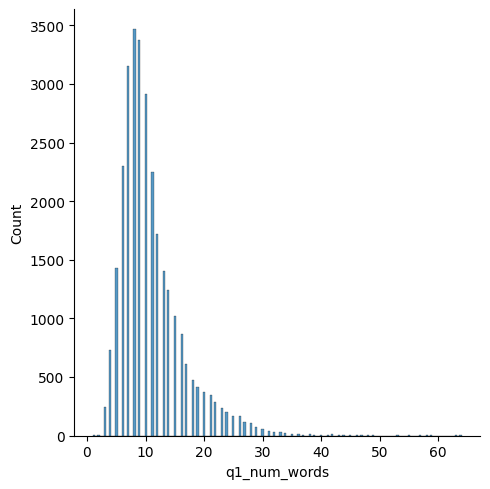

In [506]:
sns.displot(new_df['q1_num_words'])
print("Minimum number of words:",new_df['q1_num_words'].min() )
print("Maximum number of words:",new_df['q1_num_words'].max() )
print("Average number of words:",int(new_df['q1_num_words'].mean()))

Minimum number of words: 2
Maximum number of words: 237
Average number of words: 11


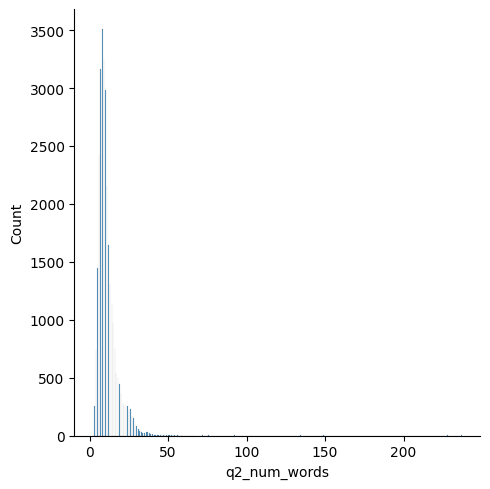

In [507]:
sns.displot(new_df['q2_num_words'])
print("Minimum number of words:",new_df['q2_num_words'].min() )
print("Maximum number of words:",new_df['q2_num_words'].max() )
print("Average number of words:",int(new_df['q2_num_words'].mean()))

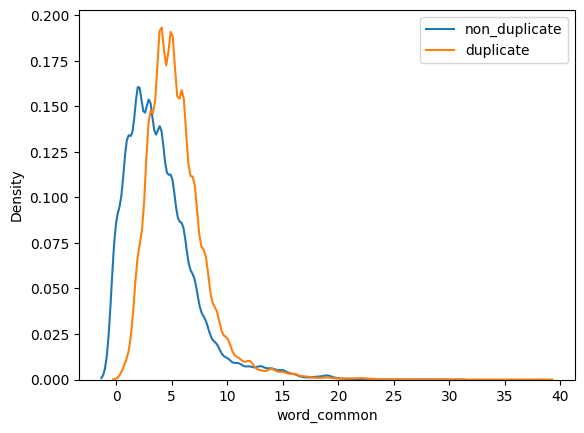

In [528]:
#common words

sns.kdeplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label='non_duplicate')
sns.kdeplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label ='duplicate')
plt.legend()

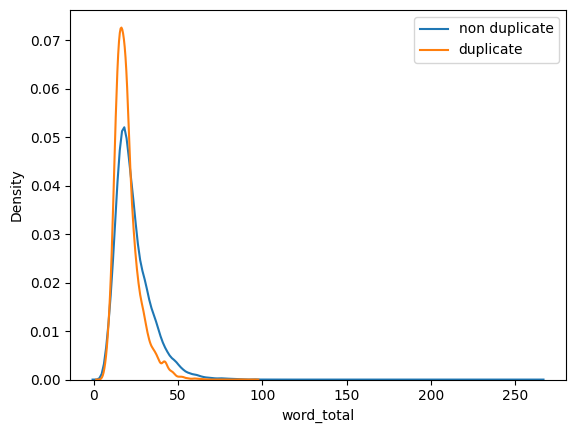

In [530]:
# total words
sns.kdeplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.kdeplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

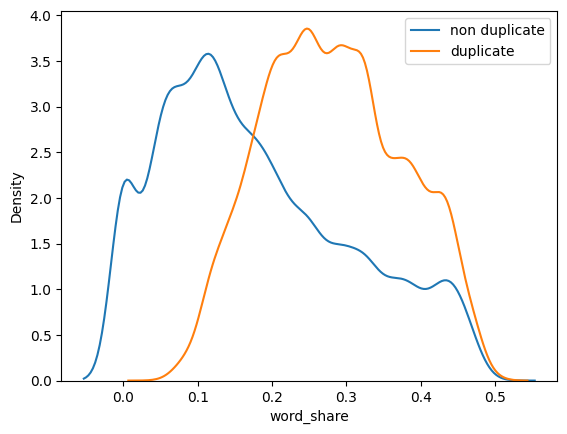

In [531]:
# word share
sns.kdeplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.kdeplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [532]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
331535,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
286200,What is substitution?,What is a substitute for caciocavallo?
157195,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...
154346,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...


In [535]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.shape

(30000, 8)

In [550]:
from sklearn.feature_extraction.text import CountVectorizer
#merging text
questions = ques_df['question1'].to_list() + ques_df['question2'].to_list()

In [551]:
cv = CountVectorizer(max_features=3000)

In [553]:
q1_arr, q2_arr = np.vsplit( cv.fit_transform(questions).toarray(),2)

In [559]:
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)

In [563]:
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

In [564]:
temp_df = pd.concat([temp_df1,temp_df2], axis=1)

In [565]:
final_df = pd.concat([final_df, temp_df], axis=1)

In [566]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
331535,1,26,44,5,8,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
45407,1,34,44,5,7,4,12,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
286200,0,21,38,3,6,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
157195,1,45,73,10,16,5,26,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
154346,1,59,64,11,12,8,23,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91979,0,43,31,9,5,1,14,0.07,0,0,...,0,0,0,0,0,0,0,0,0,0
125045,1,37,27,8,6,5,14,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
313995,0,40,99,8,17,0,25,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
203571,0,35,32,6,4,1,10,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [572]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [573]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.771